## **Step 1: Import the necessary libraries:**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

## **Step 2: Load & explore the dataset:**

In [5]:
# Load the dataset:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
# Renaming the first column "Unnamed" as "Index"
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
# Discovering number of rows & columns:
df.shape

(200, 5)

In [8]:
# Basic summary about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# Statistical exploration of dataset:
df.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
# Checking for null values:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

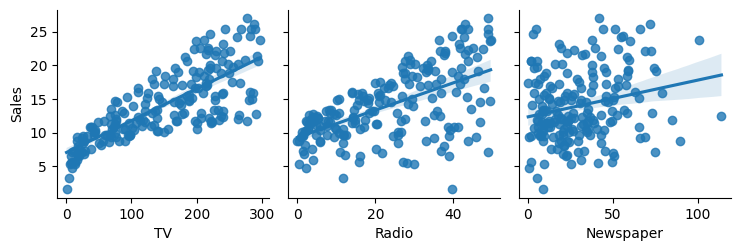

In [23]:
# Identifying correlations & patterns between independent variables(TV, Radio, Newspaper) & dependent variable(Sales):
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
plt.show()

## **Step 3: Prepare the data - Split into features (X) and target (y):**
Separate the features (advertising channels: TV, Radio, Newspaper) and the target variable (Sales).

In [12]:
# Assigning (TV,Radio,Newspaper) as features to "X" by dropping column 'Index' & 'Sales' from the dataset:
# Here TV, Radio, Newspaper are independent variables:
X = df.drop(['Index','Sales'], axis=1)
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [13]:
# Assigning 'Sales' as a target to "y":
# Here Sales is the dependent variable which is dependent on TV, Radio, Newspaper:
y = df['Sales']
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


## **Step 4: Split the data into training and testing sets:**

In [14]:
# Here test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
#X_train: This is the training set for the features (80% of the data)
#X_test: This is the testing set for the features (20% of the data)
#y_train: This is the training set for the target variable corresponding to X_train (80% of the data)
#y_test: This is the testing set for the target variable corresponding to X_test (20% of the data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

## **Step 5: Train the linear regression model on the training data:**

In [15]:
# Train the model on the training data using the fit() method:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Step 6: Make predictions on the test data:**

In [16]:
# Making predictions(y_predictions) based on the test data(X_test):
y_predictions = model.predict(X_test)
y_predictions

array([ 8.54034679, 15.57247463, 12.00612144,  9.67279861, 11.42385092,
       18.55293488, 24.02278242,  7.05365828, 22.12551494, 16.72065638,
        7.85081793, 23.11509395, 19.18719498,  5.40127091, 15.23576551,
        9.90642579, 11.94342451,  9.81855823, 21.14401409,  9.1534307 ,
       20.44468759, 12.29808365, 13.5869414 , 10.57031008, 16.26513055,
        7.86253245, 20.69472029, 20.35016487,  9.00527669, 14.11934464,
       17.20367735, 15.11272068, 17.23013018, 19.08466691, 17.13277712,
       12.31707038, 12.73960467,  6.07982336, 10.01695956, 13.32737828])

## **Step 7: Evaluate the model's performance:**

In [17]:
# Evaluating the model for it's accuracy:
mae = mean_absolute_error(y_test, y_predictions)
rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
r2 = r2_score(y_test, y_predictions)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.1579489313567062
Root Mean Squared Error: 1.4335357663627921
R-squared: 0.9286102071081018


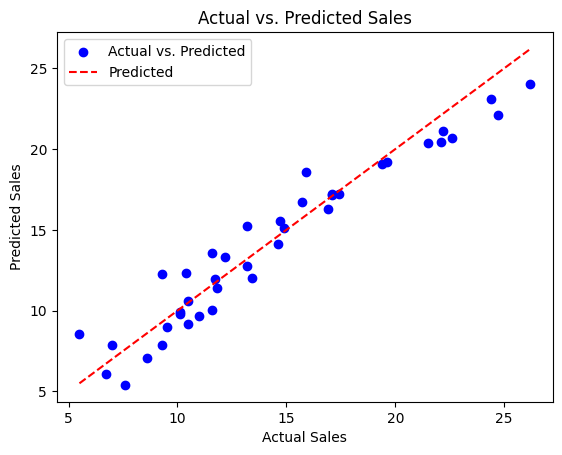

In [18]:
# Scatter plot of the actual sales values against the predicted values:
plt.scatter(y_test, y_predictions, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

In [19]:
# coef_ attribute of the trained model for "TV":
coefficient_for_tv = model.coef_[0]
print("Coefficient for 'TV':", coefficient_for_tv)

Coefficient for 'TV': 0.04536766891688484


In [20]:
# coef_ attribute of the trained model for "Radio":
coefficient_for_radio = model.coef_[1]
print("Coefficient for 'Radio':", coefficient_for_radio)

Coefficient for 'Radio': 0.18669444153224196


In [21]:
# coef_ attribute of the trained model for "Newspaper":
coefficient_for_newspaper = model.coef_[2]
print("Coefficient for 'Newspaper':", coefficient_for_newspaper)

Coefficient for 'Newspaper': -0.0005220115615836574
